# Loading Packages

In [45]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt  # For plotting graphs 
import warnings
import statsmodels.api as sm 
import pylab as py 
warnings.filterwarnings("ignore")   # To ignore any warnings warnings.filterwarnings("ignore")
from fitter import Fitter, get_common_distributions, get_distributions

In [1]:
!pip install fitter

     |████████████████████████████████| 55 kB 3.4 MB/s 
  Created wheel for fitter: filename=fitter-1.3.0-py3-none-any.whl size=24763 sha256=bcf2e0f3543aa4e99a91f7f1d00df2d1b8cc03e0d3074a897fc6cf2fcd65907e
  Stored in directory: /root/.cache/pip/wheels/b3/fb/07/86487066f9376e93b115a54f6f8299d7609fc623ef912a6f5a
  Created wheel for easydev: filename=easydev-0.11.1-py3-none-any.whl size=64267 sha256=4ab8e6f9d669f2afaa7bccecd414ed17cd23189dbedbb7021e1f6c0f1f53ca50
  Stored in directory: /root/.cache/pip/wheels/56/fc/6d/9d9b5562f4fc029cbe483d577d3110d274a82116fee348af10
Successfully built fitter easydev


# Reading data

In [4]:
data=pd.read_csv("loan.csv")

# Understanding Data

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.shape 

(614, 13)

In [7]:
# Print data types for each variable train.dtypes
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### 1 : Identify the categorical and continuous features in the data ?

In [19]:
data['Dependents'] = data['Dependents'].astype('category')
data['Credit_History'] = data['Credit_History'].astype('category')
categorical = data.select_dtypes(include=[object,'category'])
categorical

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [20]:
numerical = data.select_dtypes(include=[float,int])
numerical

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


### 2. What kind of distribution is followed by Applicant Income ?

The plot is exponential plot.It is plotted through kdeplot and histplot.

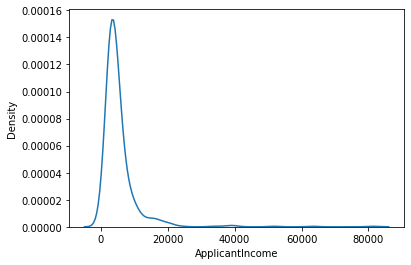

In [21]:
sns.kdeplot(data.ApplicantIncome)

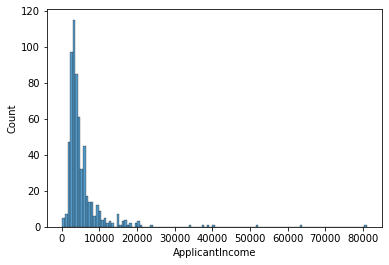

In [33]:
sns.histplot(data.ApplicantIncome)

,sumsquare_error,aic,bic,kl_div
cauchy,1.455629e-08,2896.680706,-15008.815905,inf
rayleigh,8.265634e-08,6393.154338,-13942.501528,inf
expon,9.268122e-08,3256.314355,-13872.214256,inf
norm,1.012255e-07,6713.009603,-13818.068796,inf
exponpow,1.134597e-07,3803.998550,-13741.593503,inf


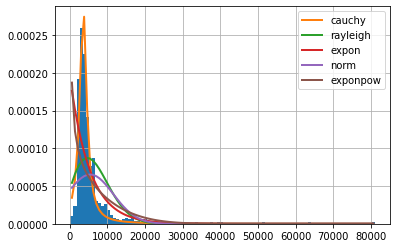

In [34]:
f = Fitter(data['ApplicantIncome'],
           distributions= get_common_distributions())
f.fit()
f.summary()

### 3. What kind of distribution is followed by CoApplicant Income ?

The plot is normal distribution plot with outliers on 0 and is right positive skewed.It is plotted through kdeplot and histplot.


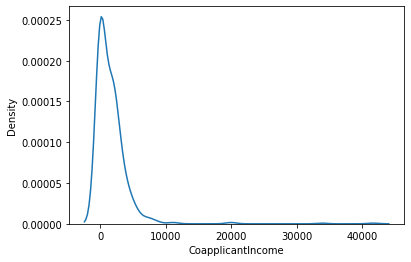

In [24]:
sns.kdeplot(data.CoapplicantIncome)

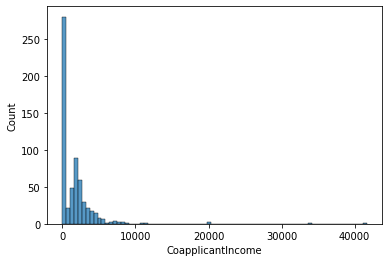

In [36]:
sns.histplot(data.CoapplicantIncome)

### 4. What kind of distribution is followed by LoanAmount ?

The distribution is normal Distribution with outliers on both ends.

In [27]:
data['LoanAmount'] = data['LoanAmount'].fillna(0)
#data['LoanAmount'] = data['LoanAmount'].astype(int)

In [28]:
data['LoanAmount'] = data['LoanAmount'].astype(int)

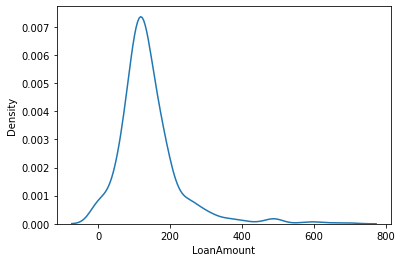

In [29]:
sns.kdeplot(data.LoanAmount)

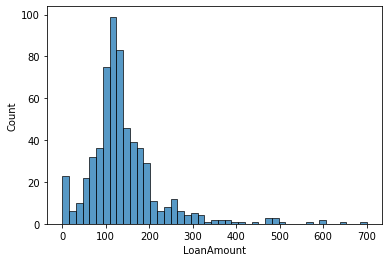

In [37]:
sns.histplot(data.LoanAmount)

### 5. Plot KDE plot with descriptive statistics for Loan Amount ?

In [38]:
loan_mean = data['LoanAmount'].mean()
loan_median = data['LoanAmount'].median()
loan_mode = data['LoanAmount'].mode()


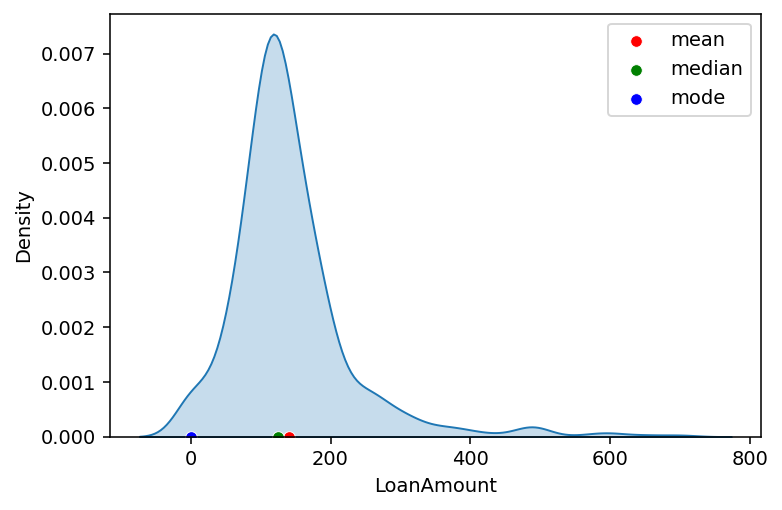

In [42]:
plt.figure(dpi = 140)
sns.kdeplot(data['LoanAmount'], shade = True)
sns.scatterplot([loan_mean],[0], color='red', label='mean')
sns.scatterplot([loan_median],[0], color='green', label='median')
sns.scatterplot([loan_mode[0]],[0], color='blue', label='mode')

### 6. Observe QQ plot for Loan Amount, Applicant Income and CoApplicant Income, derive your insights from them ?

Since most of the points lie on the line it is normally distributed.

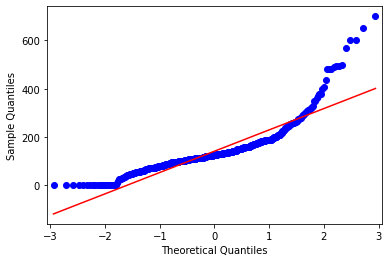

In [46]:
sm.qqplot(data['LoanAmount'], line='s') 
py.show() 

Since most of the points are not on the line it is not normally distributed and has outliers present.

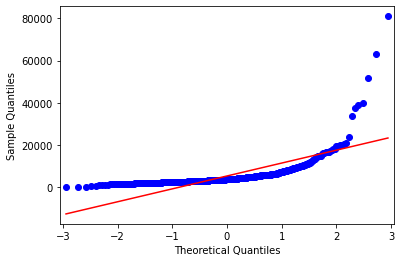

In [47]:
sm.qqplot(data['ApplicantIncome'], line='s') 
py.show()

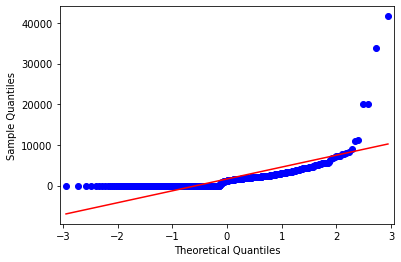

In [48]:
sm.qqplot(data['CoapplicantIncome'], line='s') 
py.show() 